## Assignment
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?<br>
Which seem to perform the best? Why?<br>
Which features seemed to be most impactful to performance?

In [74]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from collections import Counter

### Build a Classifier

In [2]:
# load amazon review data
source = pd.read_csv('~/Desktop/Data_Science/sentiment/amazon_cells_labelled.txt', sep='\t', names=['text', 'rating'])

In [3]:
source.head()

,text,rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
keywords = ['good', 'great', 'impressed', 'recommend', 'excellent', 'awesome', 'like', 'best', 'nice', 'love', \
            'pleased', 'glad', 'incredible', 'well']

In [5]:
capKeywords = []
bigKeywords = []

#make each keyword a feature
for key in keywords:
    source[str(key)] = source.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )  
    
#make feature of each keyword capitalized
for word in keywords:
    word = str(word).capitalize()
    capKeywords.append(str(word))
    source[str(word)] = source.text.str.contains(
        str(word) + ' ',
        case=False
    )
    
#make feature of each keyword in all caps
for word in keywords:
    word = str(word).upper()
    bigKeywords.append(str(word))
    source[str(word)] = source.text.str.contains(
        str(word) + ' ',
        case=False
    )

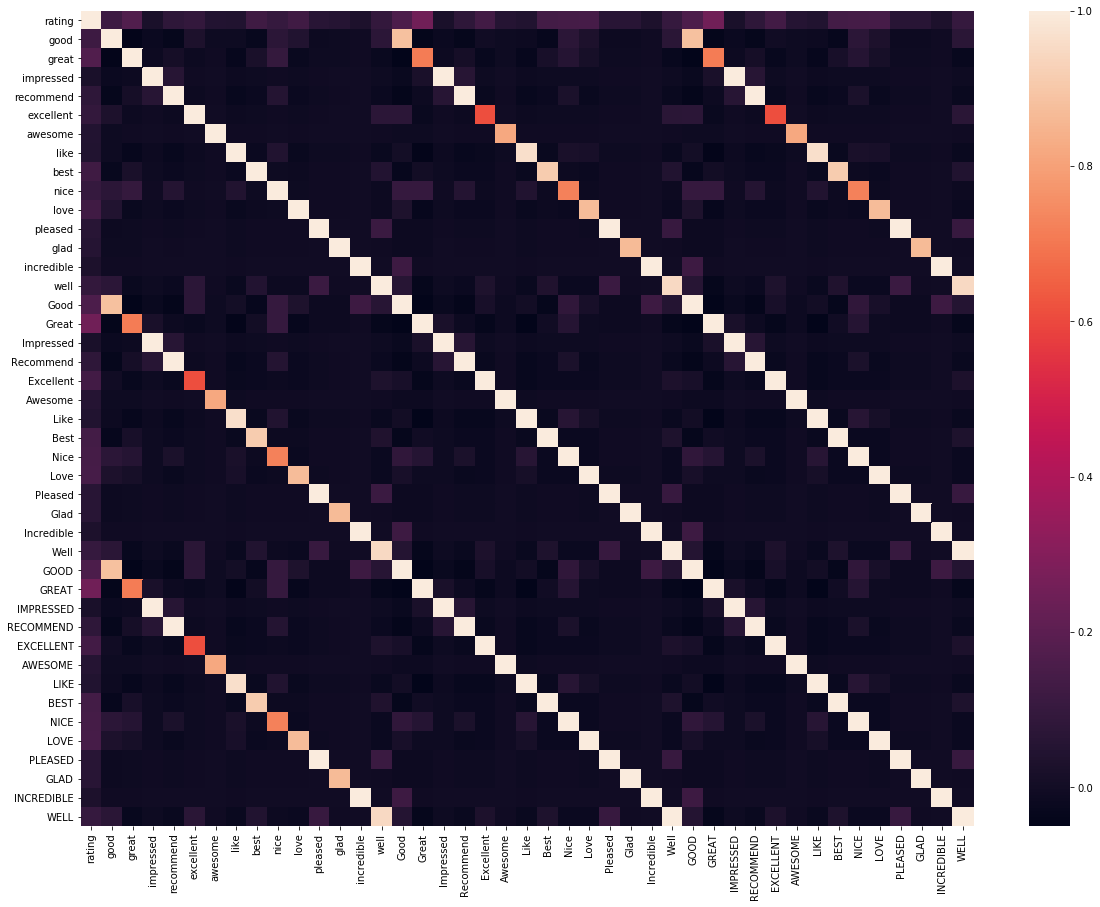

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(source.corr())

In [7]:
data = source[keywords + capKeywords + bigKeywords]
target = source['rating']

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 302


In [9]:
#establish list of features
Features = keywords + capKeywords + bigKeywords

#initiate dataframe
FeatureCorrelations = pd.DataFrame()

#add row for each feature
FeatureCorrelations['Feature'] = Features

#add column with correlation value for each feature
FeatureCorrelations['Correlations'] = FeatureCorrelations['Feature'].apply(lambda x: source[x].corr(target))

#sort dataframe by correlation
FeatureCorrelations.reindex(FeatureCorrelations.Correlations.abs().sort_values(ascending=False).index)

,Feature,Correlations
15,Great,0.251067
29,GREAT,0.251067
1,great,0.173537
28,GOOD,0.160518
14,Good,0.160518
37,LOVE,0.146460
23,Love,0.146460
22,Nice,0.139169
36,NICE,0.139169
21,Best,0.135388


### Test on another dataset

In [10]:
def Classifier(source, keywords):

    capKeywords = []
    bigKeywords = []

    #make each keyword a feature
    for key in keywords:
        source[str(key)] = source.text.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )  
    
    #make feature of each keyword capitalized
    for word in keywords:
        word = str(word).capitalize()
        capKeywords.append(str(word))
        source[str(word)] = source.text.str.contains(
            str(word) + ' ',
            case=False
        )
    
    #make feature of each keyword in all caps
    for word in keywords:
        word = str(word).upper()
        bigKeywords.append(str(word))
        source[str(word)] = source.text.str.contains(
            str(word) + ' ',
            case=False
        )
    
    data = source[keywords + capKeywords + bigKeywords]
    target = source['rating']
    
       # Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(data)

    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0],
        (target != y_pred).sum()
    ))

In [11]:
def CorrTest(source, keywords):
    #establish list of features
    Features = keywords + capKeywords + bigKeywords

    #initiate dataframe
    FeatureCorrelations = pd.DataFrame()

    #add row for each feature
    FeatureCorrelations['Feature'] = Features

    #add column with correlation value for each feature
    FeatureCorrelations['Correlations'] = FeatureCorrelations['Feature'].apply(lambda x: source[x].corr(target))

    #sort dataframe by correlation
    return FeatureCorrelations.reindex(FeatureCorrelations.Correlations.abs().sort_values(ascending=False).index)

In [12]:
# load yelp review data
yelp = pd.read_csv('~/Desktop/Data_Science/sentiment/yelp_labelled.txt', sep='\t', names=['text', 'rating'])

In [13]:
Classifier(yelp, keywords)

Number of mislabeled points out of a total 1000 points : 356


In [14]:
CorrTest(yelp, keywords)

,Feature,Correlations
41,WELL,5.997170e-02
27,Well,5.997170e-02
13,well,5.179540e-02
10,pleased,4.476615e-02
24,Pleased,4.476615e-02
38,PLEASED,4.476615e-02
30,IMPRESSED,-4.253287e-02
16,Impressed,-4.253287e-02
2,impressed,-4.253287e-02
35,BEST,-4.090444e-02


In [15]:
# load yelp review data
imdb = pd.read_csv('~/Desktop/Data_Science/sentiment/imdb_labelled.txt', sep='\t', names=['text', 'rating'])

In [16]:
Classifier(imdb, keywords)

Number of mislabeled points out of a total 748 points : 318


In [17]:
CorrTest(imdb, keywords)

,Feature,Correlations
3,recommend,-0.058819
17,Recommend,-0.058819
31,RECOMMEND,-0.058819
38,PLEASED,-0.053181
10,pleased,-0.053181
24,Pleased,-0.053181
4,excellent,0.049225
36,NICE,0.047043
8,nice,0.047043
22,Nice,0.047043


## Iterate

In [181]:
#define data
def DefineData(target):
    print('Total Number of messages:', target.size)
    print('Number of positive messages:', target.sum())
    print('Baseline Accuracy: {}'.format('{0:.2%}'.format(target.sum()/target.size)))

In [182]:
DefineData(target)

Total Number of messages: 1000
Number of positive messages: 500
Baseline Accuracy: 50.00%


In [50]:
#count words in reviews
from collections import Counter

def CountWords(textColumn):
    words = []
    for row in textColumn:
        row.lower()
        row.replace("'", "")
        row.replace(".", " ")
        for word in row.split():
            words.append(word)
    return Counter(words).most_common()


In [51]:
CountWords(source.text)

[('the', 414),
 ('and', 307),
 ('I', 303),
 ('is', 238),
 ('a', 207),
 ('to', 195),
 ('it', 176),
 ('this', 143),
 ('my', 130),
 ('of', 117),
 ('for', 114),
 ('phone', 110),
 ('with', 106),
 ('The', 97),
 ('not', 91),
 ('was', 87),
 ('on', 86),
 ('in', 84),
 ('very', 80),
 ('have', 72),
 ('that', 71),
 ('It', 61),
 ('good', 53),
 ('This', 53),
 ('you', 52),
 ('had', 43),
 ('as', 42),
 ('but', 41),
 ('are', 40),
 ('has', 33),
 ('great', 33),
 ('one', 32),
 ('sound', 32),
 ('quality', 32),
 ('from', 32),
 ('your', 32),
 ('so', 32),
 ('it.', 31),
 ('Great', 30),
 ('would', 30),
 ('like', 30),
 ('headset', 29),
 ('phone.', 28),
 ("I've", 28),
 ('works', 28),
 ('than', 27),
 ('battery', 27),
 ('all', 27),
 ('use', 27),
 ('be', 25),
 ('recommend', 24),
 ('product', 24),
 ('-', 24),
 ('or', 23),
 ('at', 23),
 ('work', 23),
 ('get', 22),
 ('really', 22),
 ('up', 21),
 ('when', 20),
 ('out', 20),
 ('product.', 20),
 ('only', 20),
 ("I'm", 20),
 ('am', 20),
 ('no', 19),
 ('me', 19),
 ('ear', 19)

### First Iteration

In [79]:
def Classifier1(source, keywords):

    #turn all text lowercase and remove puncuation
    source.astype(str).apply(lambda x: x.str.lower())
    source.replace("'", "")
    source.replace(".", " ")
    
    #make each keyword a feature
    for key in keywords:
        source[str(key)] = source.text.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )  
    
    
    data = source[keywords]
    target = source['rating']
    
       # Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(data)

    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0], (target != y_pred).sum()))
    print("Accuracy Percentage: {}".format(
        '{0:.2%}'.format(((target == y_pred).sum()) / data.shape[0])))
    
    print(confusion_matrix(target, y_pred))

In [80]:
Classifier1(source, keywords)

Number of mislabeled points out of a total 1000 points : 361
Accuracy Percentage: 63.90%
[[467  33]
 [328 172]]


In [81]:
Classifier1(yelp, keywords)

Number of mislabeled points out of a total 1000 points : 374
Accuracy Percentage: 62.60%
[[478  22]
 [352 148]]


In [82]:
Classifier1(imdb, keywords)

Number of mislabeled points out of a total 748 points : 321
Accuracy Percentage: 57.09%
[[336  26]
 [295  91]]


### Second Iteration

In [106]:
keywords2 = keywords = ['good', 'great', 'recommend', 'excellent', 'awesome', 'like', 'best', 'nice', 'love', \
            'pleased', 'glad', 'incredible', 'well', 'terrible', 'waste']

In [107]:
def Classifier2(source, keywords):

    #turn all text lowercase and remove puncuation
    source.astype(str).apply(lambda x: x.str.lower())
    source.replace("'", "")
    source.replace(".", " ")
    
    #make each keyword a feature
    for key in keywords:
        source[str(key)] = source.text.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )  
    
    data = source[keywords]
    target = source['rating']
    
       # Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(data)

    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0], (target != y_pred).sum()))
    print("Accuracy Percentage: {}".format(
        '{0:.2%}'.format(((target == y_pred).sum()) / data.shape[0])))
    
    print("Confusion Matrix:", confusion_matrix(target, y_pred))

In [108]:
def CorrTest(source, keywords):

    #initiate dataframe
    FeatureCorrelations = pd.DataFrame()

    #add row for each feature
    FeatureCorrelations['Feature'] = keywords

    #add column with correlation value for each feature
    FeatureCorrelations['Correlations'] = FeatureCorrelations['Feature'].apply(lambda x: source[x].corr(target))

    #sort dataframe by correlation
    return FeatureCorrelations.reindex(FeatureCorrelations.Correlations.abs().sort_values(ascending=False).index)

In [109]:
Classifier2(source, keywords2)

Number of mislabeled points out of a total 1000 points : 369
Accuracy Percentage: 63.10%
Confusion Matrix: [[468  32]
 [337 163]]


In [110]:
CorrTest(source, keywords2)

,Feature,Correlations
1,great,0.173537
8,love,0.127515
6,best,0.123404
0,good,0.119296
14,waste,-0.105463
7,nice,0.100504
12,well,0.090259
3,excellent,0.089803
2,recommend,0.078406
9,pleased,0.063372


In [111]:
Classifier2(yelp, keywords2)

Number of mislabeled points out of a total 1000 points : 381
Accuracy Percentage: 61.90%
Confusion Matrix: [[478  22]
 [359 141]]


In [112]:
CorrTest(yelp, keywords2)

,Feature,Correlations
12,well,5.179540e-02
9,pleased,4.476615e-02
4,awesome,3.598302e-02
11,incredible,3.163860e-02
6,best,-2.468070e-02
7,nice,2.320706e-02
5,like,-1.994126e-02
13,terrible,-1.828487e-02
14,waste,-1.417762e-02
2,recommend,9.587503e-03


In [113]:
Classifier2(imdb, keywords2)

Number of mislabeled points out of a total 748 points : 319
Accuracy Percentage: 57.35%
Confusion Matrix: [[338  24]
 [295  91]]


In [114]:
CorrTest(imdb, keywords2)

,Feature,Correlations
2,recommend,-0.058819
9,pleased,-0.053181
3,excellent,0.049225
7,nice,0.047043
12,well,0.043875
5,like,-0.037589
4,awesome,-0.037580
11,incredible,0.034714
0,good,0.030353
6,best,-0.022442


### Third Iteration

In [161]:
keywords3 = keywords = ['good', 'great', 'recommend', 'excellent', 'awesome', 'like', 'best', 'nice', 'love', \
            'pleased', 'glad', 'incredible', 'well', 'terrible', 'waste', 'problems', 'hate']

In [162]:
def Classifier3(source, keywords):

    #turn all text lowercase and remove puncuation
    source.astype(str).apply(lambda x: x.str.lower())
    source.replace("'", "")
    source.replace(".", " ")
    
    #make each keyword a feature
    for key in keywords:
        source[str(key)] = source.text.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )  
    
    data = source[keywords]
    target = source['rating']

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(data)

    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0], (target != y_pred).sum()))
    print("Accuracy Percentage: {}".format(
        '{0:.2%}'.format(((target == y_pred).sum()) / data.shape[0])))
    
    print("Confusion Matrix:", confusion_matrix(target, y_pred))
    print(cross_val_score(bnb, data, target, cv=10))

In [163]:
Classifier3(source, keywords3)

Number of mislabeled points out of a total 1000 points : 369
Accuracy Percentage: 63.10%
Confusion Matrix: [[468  32]
 [337 163]]
[0.64 0.65 0.65 0.62 0.65 0.61 0.65 0.59 0.65 0.57]


In [164]:
CorrTest(source, keywords3)

,Feature,Correlations
1,great,0.173537
8,love,0.127515
6,best,0.123404
0,good,0.119296
14,waste,-0.105463
7,nice,0.100504
12,well,0.090259
3,excellent,0.089803
2,recommend,0.078406
9,pleased,0.063372


### Fourth Iteration

In [165]:
#count phrases in reviews
def CountPhrases(textColumn):
    phrases = []
    for row in textColumn:
        row = row.lower()
        row.replace("'", "")
        row.replace(".", " ")
        rowList = row.split()
        i = 1
        while i < len(rowList):
            phrases.append(rowList[i-1] + " " + rowList[i])
            i += 1
    return Counter(phrases).most_common()

In [166]:
CountPhrases(source.text)

[('i have', 39),
 ('and the', 33),
 ('it is', 33),
 ('with the', 30),
 ('the phone', 30),
 ('and it', 27),
 ('for the', 26),
 ('on the', 26),
 ('is a', 26),
 ('this is', 25),
 ('of the', 25),
 ('in the', 21),
 ('is very', 21),
 ('this phone', 21),
 ('with my', 19),
 ('it was', 19),
 ('and i', 18),
 ('i was', 18),
 ('does not', 18),
 ('i am', 18),
 ('the sound', 17),
 ('is the', 17),
 ('i would', 16),
 ('if you', 15),
 ('to use', 15),
 ('the best', 15),
 ('a great', 15),
 ('for a', 15),
 ('this product', 14),
 ('in my', 14),
 ('with this', 14),
 ('phone is', 13),
 ('i love', 13),
 ('the battery', 13),
 ('my phone', 13),
 ('i had', 12),
 ('a few', 12),
 ('a good', 12),
 ('easy to', 12),
 ('the same', 12),
 ('have to', 11),
 ('do not', 11),
 ('i bought', 11),
 ('happy with', 11),
 ('to be', 11),
 ('that i', 11),
 ('the ear', 10),
 ('it has', 10),
 ('this product.', 10),
 ('recommend this', 10),
 ('i could', 10),
 ('to get', 9),
 ('quality is', 9),
 ('was very', 9),
 ('in a', 9),
 ('love t

In [170]:
keywords4 = keywords = ['good', 'great', 'recommend', 'excellent', 'awesome', 'like', 'best', 'nice', 'love', \
            'pleased', 'glad', 'well', 'terrible', 'waste', 'problems', 'hate', 'i love', 'easy to', 'does not']

In [171]:
def Classifier4(source, keywords):

    #turn all text lowercase and remove puncuation
    source.astype(str).apply(lambda x: x.str.lower())
    source.replace("'", "")
    source.replace(".", " ")
    
    #make each keyword a feature
    for key in keywords:
        source[str(key)] = source.text.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )  
    
    data = source[keywords]
    target = source['rating']

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(data)

    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0], (target != y_pred).sum()))
    print("Accuracy Percentage: {}".format(
        '{0:.2%}'.format(((target == y_pred).sum()) / data.shape[0])))
    
    print("Confusion Matrix:", confusion_matrix(target, y_pred))
    print(cross_val_score(bnb, data, target, cv=10))

In [174]:
Classifier4(source, keywords4)

Number of mislabeled points out of a total 1000 points : 365
Accuracy Percentage: 63.50%
Confusion Matrix: [[466  34]
 [331 169]]
[0.65 0.65 0.65 0.63 0.66 0.59 0.66 0.6  0.65 0.59]


In [175]:
CorrTest(source, keywords4)

,Feature,Correlations
1,great,0.173537
8,love,0.127515
6,best,0.123404
0,good,0.119296
13,waste,-0.105463
7,nice,0.100504
11,well,0.090259
3,excellent,0.089803
2,recommend,0.078406
9,pleased,0.063372
